# Exercise Thirteen: Interface

This week, you'll be revisiting a database (such as our example, gathered from Tweepy) and exploring methods for visualizing the data to others. Your exercise should:

- Import or collect your data as appropriate, using OS or an API
- Make and structure your data in a Pandas dataframe
- Use NLTK to tokenize the data, and chart a word cloud
- Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API
- Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed

Consider exploring other visualization types in the Bokeh API documentation, and play with the color options and scale of your visualization.



In [5]:
#documented at: https://towardsdatascience.com/web-scraping-metacritic-reviews-using-beautifulsoup-63801bbe200e
#we're going back to week six to import reviews, but this time we're getting all of them!

import requests
from bs4 import BeautifulSoup
import pandas as pd

In [8]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}
for i in range(0,39):
    url = 'https://www.metacritic.com/game/switch/animal-crossing-new-horizons/user-reviews?page=' + str(i)
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response = requests.get(url, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    for review in soup.find_all('div', class_='review_content'): 
        if review.find('div', class_='name') == None:
            break 
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        if review.find('span', class_='blurb blurb_expanded'): 
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
           # print(review.find('span', class_='blurb blurb_expanded').text)
        elif review.find('div',class_='review_body').find('span') == None:
            review_dict['review'].append('No review text.')
           # print("No review")
        else:
            review_dict['review'].append(review.find('div',class_='review_body').find('span').text)
          #  print(review.find('div',class_='review_body').find('span').text)

In [10]:
ac_reviews = pd.DataFrame(review_dict)
print(ac_reviews)

               name          date rating  \
0             HowTo  May  7, 2021      0   
1            Kefero  May  7, 2021      0   
2            sunnyh  Mar 22, 2020      4   
3            KC1994  Mar 21, 2020      4   
4     NathanDetr0it  Mar 24, 2020      4   
...             ...           ...    ...   
3832          RC568  Nov 13, 2021      7   
3833      ancarroll  Nov  3, 2021     10   
3834         stibba  Nov  6, 2021      4   
3835    DanteMerino  Nov  7, 2021      8   
3836         Ray82z  Nov 14, 2021      3   

                                                 review  
0     Don't trust the critics, they are false. I've ...  
1     The game is visually alright. However, it is q...  
2     I'm cool with the one island per console limit...  
3     It’s a fun game, very reminiscent of the old A...  
4     "One Dictator, Seven Slaves" same-console mult...  
...                                                 ...  
3832  this game is literally just an early access ga...  
3833  W

In [13]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

In [15]:
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_reviews(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [17]:
cleaned_reviews = []
for i in range(0,len(ac_reviews['review'])):
    cleaned_reviews.append(cleaning_reviews((ac_reviews.review[i])))
print(cleaned_reviews[0:5])

['don trust the critics they are false seen critics with lower ratings than overall the game disappointing and lacking false advertising updates are lackluster and the game unplayable buggy well some sprites wouldn load until seconds later', 'the game visually alright however quite horrible compared other animal crossing games not only this but the fact that marketed relaxing throws off animal crossing supposed fun not relaxing very terrible title and have got refund two weeks ago', 'cool with the one island per console limitation but its insane that progress the game restricted what player one does recently started island with wife what wife quits playing the game will have start over crazy', 'fun game very reminiscent the old animal crossing games however the inability for users the same switch have different islands isn cool fact only the first player the switch can complete assignments from tom nook and other characters not even second copy the game will rectify this the only way r

In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["animal","crossing","nintendo","switch"])

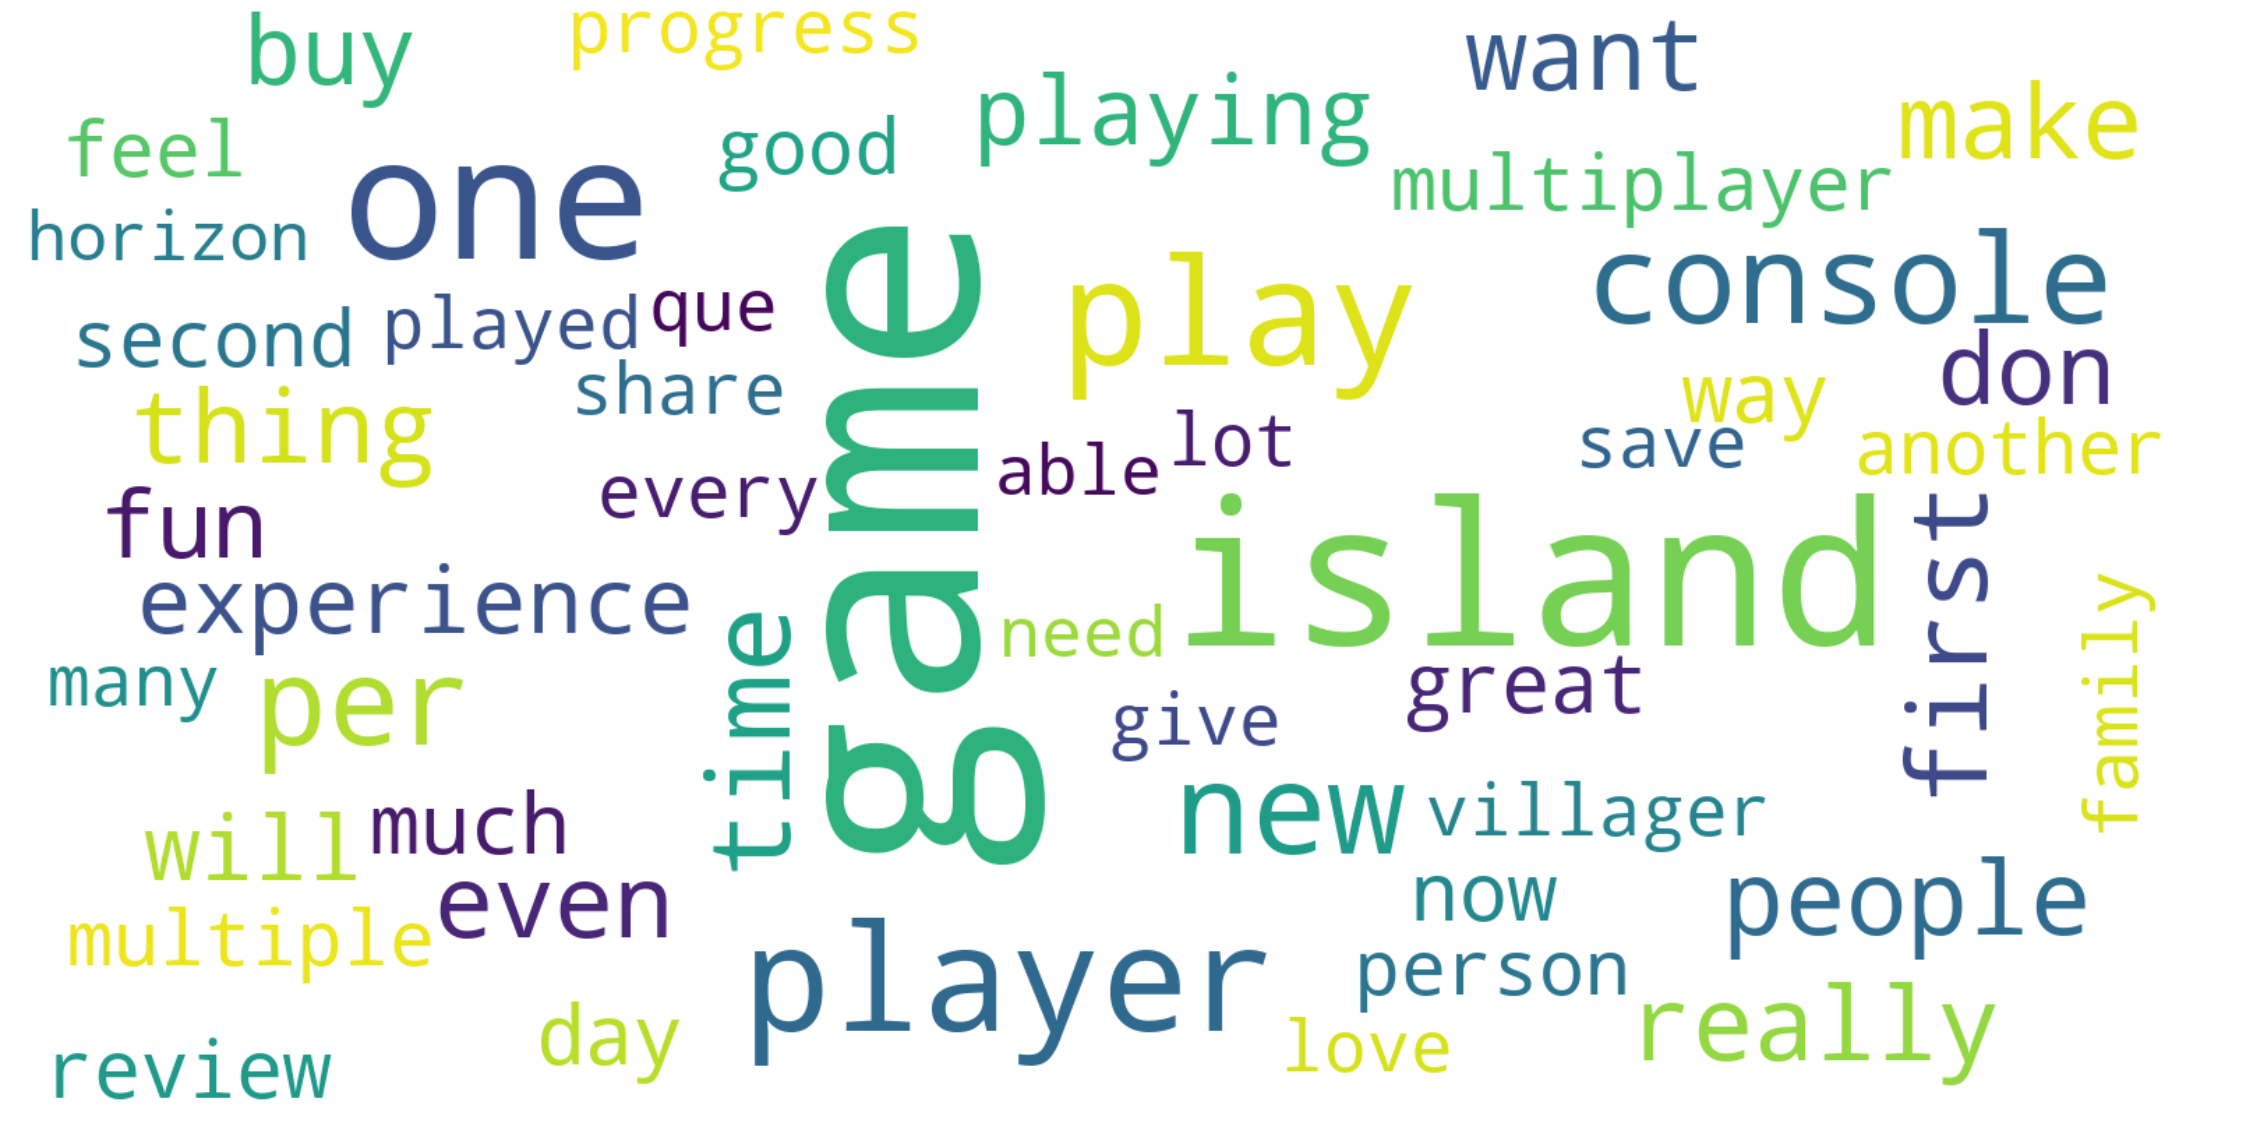

In [22]:
string = pd.Series(cleaned_reviews).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [46]:
import numpy as np
from PIL import Image
import random

mask = np.array(Image.open('./nook.jpg'))

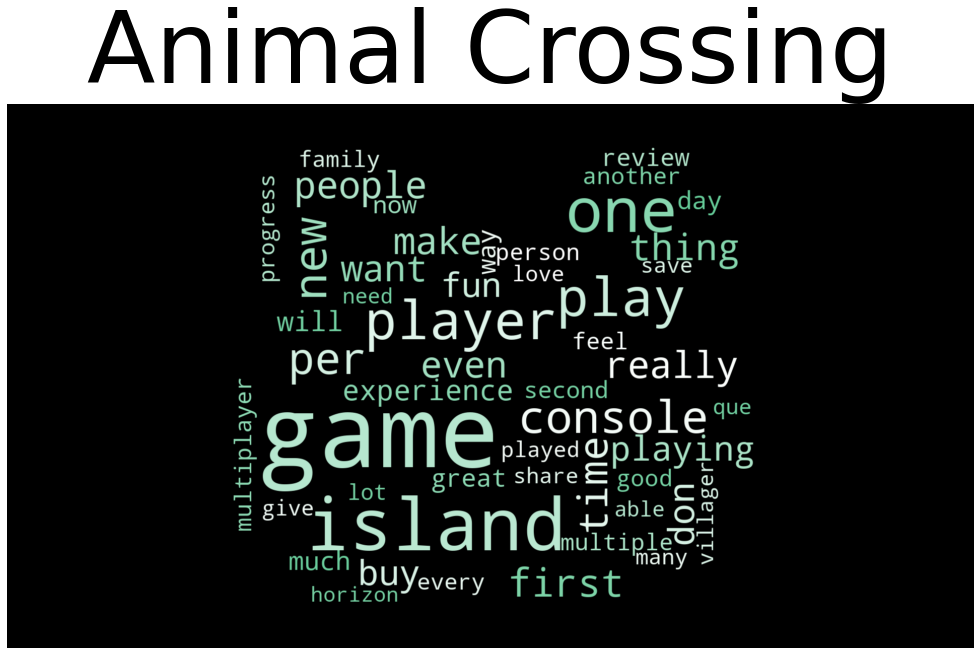

In [47]:
wordcloud = WordCloud(width=2000, mask = mask,stopwords=stopwords,height=1000,max_font_size=200,max_words=50,collocations=False,background_color='black').generate(string)
f = plt.figure(figsize=(20,10))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
def green_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(150, 50%%, %d%%)" % random.randint(60, 100)
plt.axis("off")

plt.imshow(wordcloud.recolor(color_func=green_color_func, random_state=3),
           interpolation="bilinear")
plt.title('Animal Crossing', size='100')
plt.axis("off")
plt.show()

In [48]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

# Next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [49]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sid.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [50]:
ac_reviews['Sentiment Score'] = ac_reviews['review'].apply(calculate_sentiment)
ac_reviews.sort_values(by='Sentiment Score', ascending=False)[:15]

,name,date,rating,review,Sentiment Score
81,XV_,"Apr 18, 2020",7,Once again I was allured to Animal Crossing mo...,0.9996
3548,Dwyerr98,"Jun 19, 2020",6,Been playing this game since launch and was re...,0.9993
3338,JLord701,"Jun 21, 2021",9,Animal Crossing: New Horizons joins titles lik...,0.9992
3713,Happyspelling,"Nov 24, 2020",10,I was super exited for this game when it was f...,0.9991
568,TehCupcakes,"Apr 29, 2020",10,Most of the negative reviews are from people w...,0.9989
3801,BLG,"Apr 3, 2021",9,The Animal Crossing series has created a uniqu...,0.9989
3742,jordanlearmonth,"Jul 24, 2020",8,Animal Crossing. An international video game f...,0.9986
726,Jordboy1,"Mar 24, 2020",10,This game is everything I was hoping the first...,0.9982
337,MorningStarn,"Mar 26, 2020",8,I've been a huge fan of the Animal Crossing fr...,0.9982
2906,Lifeisbellablog,"May 2, 2020",8,"This may not be the most complex game, but som...",0.9981


In [93]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.palettes import Viridis256
from bokeh.models.tools import HoverTool
from bokeh.models.formatters import DatetimeTickFormatter
from bokeh.models import ColorBar
from bokeh.transform import linear_cmap
from bokeh.models.tools import WheelZoomTool
from bokeh.transform import jitter

#file for output
output_file(filename="ac.html", title="AC Reviews Visualization")

In [108]:
ac_reviews['rating'] = ac_reviews['rating'].astype(int)
source = ColumnDataSource(ac_reviews)
mapper = linear_cmap(field_name='Sentiment Score', palette=Viridis256 ,low=-1 ,high=1)
p = figure(plot_height=1000, plot_width=1000, toolbar_location="below")
p.circle(x=jitter('rating',width=1,range=p.x_range), y='Sentiment Score', source=source, size=5, line_color=mapper,color=mapper, fill_alpha=1)
p.toolbar.active_scroll = WheelZoomTool()
p.title.text = 'Animal Crossing Reviews'
p.xaxis.axis_label = 'Review Score'
p.yaxis.axis_label = 'Sentiment Score'

In [109]:
from bokeh.models.tools import PanTool, WheelZoomTool

color_bar = ColorBar(color_mapper=mapper['transform'], width=8)
p.background_fill_color = "gray"
p.add_layout(color_bar, 'right')

hover = HoverTool()
hover.tooltips= """
<div style="width:200px;"><b>Review: </b>
@review
</div>
"""

p.add_tools(hover)

output_notebook()

show(p)

Loading BokehJS ...